# Predicting Taxi Fares

### **Task Description**

The task is to use the taxi trip dataset to implement a model that given any feature of your choice, should predict the total amount spent by the customers. 

The approach we'll use is to use the independent variables to predict the fare amount and add the predicted fare amount to the other additonal charges to get the total amount. 

The fare amount will mainly be predicted using the trip duration, trip distance and location information.

**Process**
- Data Ingestion
- Exploratory Data Analysis
- Feature Engineering
- Feature Selection'
- Model Building
- Model Deployment

### Data Ingestion

Loading the raw data from the downloaded csv file

In [30]:
#importing necessary libs
import numpy as np
import pandas as pd

#data visualisation
import seaborn as sns     
sns.set_theme(palette='deep')
import matplotlib.pyplot as plt
%matplotlib inline
#import plotly.express as px

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)


In [4]:
#Loading data from the csv file/loading the sample data
dataset = pd.read_csv("..\Data\Yellow_Taxi_Trip_Sample.csv")

In [5]:
dataset.shape

(1134081, 18)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134081 entries, 0 to 1134080
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1134081 non-null  int64  
 1   VendorID               1134081 non-null  int64  
 2   tpep_pickup_datetime   1134081 non-null  object 
 3   tpep_dropoff_datetime  1134081 non-null  object 
 4   passenger_count        1134081 non-null  int64  
 5   trip_distance          1134081 non-null  float64
 6   RatecodeID             1134081 non-null  int64  
 7   store_and_fwd_flag     1134081 non-null  object 
 8   PULocationID           1134081 non-null  int64  
 9   DOLocationID           1134081 non-null  int64  
 10  payment_type           1134081 non-null  int64  
 11  fare_amount            1134081 non-null  float64
 12  extra                  1134081 non-null  float64
 13  mta_tax                1134081 non-null  float64
 14  tip_amount        

In [7]:
dataset.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [90]:
dataset.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,2,07/27/2017 06:31:15 PM,07/27/2017 06:48:44 PM,2,2.25,1,N,230,246,2,13.0,1.0,0.5,0.0,0.0,0.3,14.8
1,1,1,07/27/2017 06:53:08 PM,07/27/2017 07:09:18 PM,1,1.80,1,N,246,230,1,11.5,1.0,0.5,2.0,0.0,0.3,15.3
2,2,1,07/27/2017 06:34:32 PM,07/27/2017 06:39:44 PM,1,0.60,1,N,141,262,1,5.0,1.0,0.5,1.0,0.0,0.3,7.8
3,3,2,07/27/2017 06:55:28 PM,07/27/2017 07:06:33 PM,2,1.01,1,N,43,141,2,8.0,1.0,0.5,0.0,0.0,0.3,9.8
4,4,2,07/27/2017 06:20:18 PM,07/27/2017 06:32:35 PM,1,1.18,1,N,48,164,2,9.0,1.0,0.5,0.0,0.0,0.3,10.8


In [8]:
dataset.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [9]:
#dropping the unamed column
dataset.drop(['Unnamed: 0'],inplace=True,axis=1)

**The following are the column descriptions:**
- VendorID: A code indicating the TPEP provider that provided the record. 
- tpep_pickup_datetime: The date and time when the meter was engaged.
- tpep_dropoff_datetime: The date and time when the meter was disengaged. 
- passenger_count: The number of passengers in the vehicle. 
- trip_distance: The elapsed trip distance in miles reported by the taximeter.
- RatecodeID: The final rate code in effect at the end of the trip.
- store_and_fwd_flag: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
- PULocationID: TLC Taxi Zone in which the taximeter was engaged
- DOLocationID: TLC Taxi Zone in which the taximeter was disengaged
- payment_type: A numeric code signifying how the passenger paid for the trip.
- fare_amount: The time-and-distance fare calculated by the meter.
- extra: Miscellaneous extras and surcharges.
- mta_tax: Tax that is automatically triggered based on the metered rate in use.
- tip_amount: Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.
- tolls_amount: Total amount of all tolls paid in trip.
- improvement_surcharge: Improvement surcharge assessed trips at the flag drop
- total_amount: The total amount charged to passengers. Does not include cash tips.


## Exploratory Data Analysis

In the EDA section, we analyse the data to find out the following:
- Missing values
- Duplicated records
- Distribution of numerical values
- Cardinality of categorical variables
- Outliers
- Relationship between independent and the dependent variable

### EDA

We start the process by cleaning the data e.g. checking for null values, duplicates and filtering out records/rows that are not relevant for the analysis.

In [10]:
data = dataset.copy()

In [11]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,07/27/2017 06:31:15 PM,07/27/2017 06:48:44 PM,2,2.25,1,N,230,246,2,13.0,1.0,0.5,0.0,0.0,0.3,14.8
1,1,07/27/2017 06:53:08 PM,07/27/2017 07:09:18 PM,1,1.80,1,N,246,230,1,11.5,1.0,0.5,2.0,0.0,0.3,15.3
2,1,07/27/2017 06:34:32 PM,07/27/2017 06:39:44 PM,1,0.60,1,N,141,262,1,5.0,1.0,0.5,1.0,0.0,0.3,7.8
3,2,07/27/2017 06:55:28 PM,07/27/2017 07:06:33 PM,2,1.01,1,N,43,141,2,8.0,1.0,0.5,0.0,0.0,0.3,9.8
4,2,07/27/2017 06:20:18 PM,07/27/2017 06:32:35 PM,1,1.18,1,N,48,164,2,9.0,1.0,0.5,0.0,0.0,0.3,10.8


In [12]:
data.shape

(1134081, 17)

In [13]:
data.nunique()

VendorID                       2
tpep_pickup_datetime     1109575
tpep_dropoff_datetime    1109699
passenger_count               10
trip_distance               3153
RatecodeID                     7
store_and_fwd_flag             2
PULocationID                 246
DOLocationID                 261
payment_type                   4
fare_amount                  697
extra                         14
mta_tax                        8
tip_amount                  2145
tolls_amount                 405
improvement_surcharge          4
total_amount                6407
dtype: int64

In [14]:
#How many vendors?
data["VendorID"].value_counts()

VendorID
2    622773
1    511308
Name: count, dtype: int64

**Converting pickup & dropoff columns to datetime datatype**

In [15]:
#Converting to datetime
data["tpep_pickup_datetime"] = pd.to_datetime(data["tpep_pickup_datetime"])
data["tpep_dropoff_datetime"] = pd.to_datetime(data["tpep_dropoff_datetime"])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20964\3691569389.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["tpep_pickup_datetime"] = pd.to_datetime(data["tpep_pickup_datetime"])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20964\3691569389.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["tpep_dropoff_datetime"] = pd.to_datetime(data["tpep_dropoff_datetime"])


In [16]:
#What is the period of the extracted data?
data["tpep_pickup_datetime"].min(),data["tpep_pickup_datetime"].max()

(Timestamp('2008-12-31 23:38:06'), Timestamp('2017-12-31 23:59:50'))

In [17]:
data.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.134081e+06,1134081,1134081,1.134081e+06,1.134081e+06,1.134081e+06,1.134081e+06,1.134081e+06,1.134081e+06,1.134081e+06,1.134081e+06,1.134081e+06,1.134081e+06,1.134081e+06,1.134081e+06,1.134081e+06
mean,1.549143e+00,2017-06-29 10:03:27.408774912,2017-06-29 10:20:00.083175168,1.624075e+00,2.927934e+00,1.044371e+00,1.628480e+02,1.608200e+02,1.336074e+00,1.297619e+01,3.309229e-01,4.972829e-01,1.839390e+00,3.256813e-01,2.996232e-01,1.627311e+01
min,1.000000e+00,2008-12-31 23:38:06,2008-12-31 23:49:30,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.000000e+02,-4.500000e+00,-5.000000e-01,-1.146000e+01,0.000000e+00,-3.000000e-01,-3.008000e+02
25%,1.000000e+00,2017-03-29 21:20:46,2017-03-29 21:34:42,1.000000e+00,9.900000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.580000e+00
50%,2.000000e+00,2017-06-23 18:14:12,2017-06-23 18:34:42,1.000000e+00,1.620000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.360000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,2017-10-01 15:52:48,2017-10-01 16:10:09,2.000000e+00,3.040000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.450000e+00,0.000000e+00,3.000000e-01,1.780000e+01
max,2.000000e+00,2017-12-31 23:59:50,2018-01-01 21:46:07,9.000000e+00,1.287000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.300000e+02,4.500000e+00,6.246000e+01,3.155600e+02,8.958900e+02,1.000000e+00,9.486900e+02
std,4.975793e-01,NaN,NaN,1.263473e+00,3.735205e+00,5.779506e-01,6.654028e+01,7.048411e+01,4.928072e-01,1.140789e+01,4.523131e-01,7.104536e-02,2.609286e+00,1.887977e+00,1.439590e-02,1.413021e+01


In [18]:
#Checking to see of there are any null values
data.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [102]:
#checking to see if there are any duplicated records
data.duplicated().sum()

0

Based on the above, there are no duplicate records/rows and no null values

In [19]:
#checking if there are records wih trip_distance ==0
sum(data['trip_distance']==0)

7405

In [20]:
data[data['trip_distance']==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
176,2,2017-07-27 18:55:04,2017-07-27 18:55:20,6,0.0,1,N,161,164,1,2.5,1.0,0.5,0.00,0.0,0.3,4.30
265,1,2017-07-27 19:53:29,2017-07-27 19:54:38,1,0.0,1,N,138,138,4,3.0,1.0,0.5,0.00,0.0,0.3,4.80
271,1,2017-07-27 19:49:33,2017-07-27 19:50:27,1,0.0,1,N,114,114,2,2.5,1.0,0.5,0.00,0.0,0.3,4.30
317,1,2017-07-27 19:23:34,2017-07-27 19:23:39,1,0.0,1,N,148,148,3,2.5,1.0,0.5,0.00,0.0,0.3,4.30
721,2,2017-07-27 21:01:49,2017-07-27 21:01:51,1,0.0,5,N,264,161,1,63.0,0.0,0.5,12.76,0.0,0.3,76.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133387,2,2017-07-27 13:36:35,2017-07-27 13:36:56,5,0.0,1,N,264,193,2,2.5,0.0,0.5,0.00,0.0,0.3,3.30
1133452,1,2017-07-27 14:37:56,2017-07-27 14:38:16,1,0.0,5,N,265,265,1,164.0,0.0,0.0,32.85,0.0,0.3,197.15
1133579,2,2017-07-27 15:41:49,2017-07-27 15:42:00,2,0.0,5,N,166,166,1,60.0,0.0,0.0,15.08,0.0,0.3,75.38
1133655,2,2017-07-27 15:30:10,2017-07-27 15:30:15,1,0.0,1,N,43,43,2,2.5,0.0,0.5,0.00,0.0,0.3,3.30


In [21]:
data['trip_distance'].value_counts()

trip_distance
0.90     26360
0.80     25893
1.00     25659
0.70     24709
1.10     24432
         ...  
31.43        1
27.97        1
28.42        1
33.48        1
29.42        1
Name: count, Length: 3153, dtype: int64

Seems from above there are records where the trip distance==0, 

### Feature Creation

This step entails creating new features from existing variables to gain more insights from the data. 

**Trip Duration**

Calculating the trip duration in minutes using the drop-off and pick up times

In [22]:
#calculating trip duration(in minutes) using pickup & dropoff times
data['trip_duration'] = (data["tpep_dropoff_datetime"] - data["tpep_pickup_datetime"]).dt.total_seconds() / 60


In [23]:
data['trip_duration']

0          17.483333
1          16.166667
2           5.200000
3          11.083333
4          12.283333
             ...    
1134076    12.083333
1134077     3.800000
1134078    20.083333
1134079     5.650000
1134080    33.150000
Name: trip_duration, Length: 1134081, dtype: float64

In [24]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,2,2017-07-27 18:31:15,2017-07-27 18:48:44,2,2.25,1,N,230,246,2,13.0,1.0,0.5,0.0,0.0,0.3,14.8,17.483333
1,1,2017-07-27 18:53:08,2017-07-27 19:09:18,1,1.80,1,N,246,230,1,11.5,1.0,0.5,2.0,0.0,0.3,15.3,16.166667
2,1,2017-07-27 18:34:32,2017-07-27 18:39:44,1,0.60,1,N,141,262,1,5.0,1.0,0.5,1.0,0.0,0.3,7.8,5.200000
3,2,2017-07-27 18:55:28,2017-07-27 19:06:33,2,1.01,1,N,43,141,2,8.0,1.0,0.5,0.0,0.0,0.3,9.8,11.083333
4,2,2017-07-27 18:20:18,2017-07-27 18:32:35,1,1.18,1,N,48,164,2,9.0,1.0,0.5,0.0,0.0,0.3,10.8,12.283333


**Day of the week,Time of day and the hour**

In [25]:
data['pickup_day']=data['tpep_pickup_datetime'].dt.day_name()
data['dropoff_day']=data['tpep_dropoff_datetime'].dt.day_name()
data['pickup_day_no']=data['tpep_pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['tpep_dropoff_datetime'].dt.weekday
data['pickup_hour']=data['tpep_pickup_datetime'].dt.hour
data['dropoff_hour']=data['tpep_dropoff_datetime'].dt.hour
data['pickup_month']=data['tpep_pickup_datetime'].dt.month
data['dropoff_month']=data['tpep_dropoff_datetime'].dt.month

In [26]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month
0,2,2017-07-27 18:31:15,2017-07-27 18:48:44,2,2.25,1,N,230,246,2,...,14.8,17.483333,Thursday,Thursday,3,3,18,18,7,7
1,1,2017-07-27 18:53:08,2017-07-27 19:09:18,1,1.80,1,N,246,230,1,...,15.3,16.166667,Thursday,Thursday,3,3,18,19,7,7
2,1,2017-07-27 18:34:32,2017-07-27 18:39:44,1,0.60,1,N,141,262,1,...,7.8,5.200000,Thursday,Thursday,3,3,18,18,7,7
3,2,2017-07-27 18:55:28,2017-07-27 19:06:33,2,1.01,1,N,43,141,2,...,9.8,11.083333,Thursday,Thursday,3,3,18,19,7,7
4,2,2017-07-27 18:20:18,2017-07-27 18:32:35,1,1.18,1,N,48,164,2,...,10.8,12.283333,Thursday,Thursday,3,3,18,18,7,7


In [27]:
#Function to determine the time of day
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [28]:
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday']=data['dropoff_hour'].apply(time_of_day)

### **Univariate Analysis**

**Target Variable: fare_amount**

To Note: We'll use the fare_amount column as our target variable

In [31]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
0,2,2017-07-27 18:31:15,2017-07-27 18:48:44,2,2.25,1,N,230,246,2,13.0,1.0,0.5,0.0,0.0,0.3,14.8,17.483333,Thursday,Thursday,3,3,18,18,7,7,Evening,Evening
1,1,2017-07-27 18:53:08,2017-07-27 19:09:18,1,1.80,1,N,246,230,1,11.5,1.0,0.5,2.0,0.0,0.3,15.3,16.166667,Thursday,Thursday,3,3,18,19,7,7,Evening,Evening
2,1,2017-07-27 18:34:32,2017-07-27 18:39:44,1,0.60,1,N,141,262,1,5.0,1.0,0.5,1.0,0.0,0.3,7.8,5.200000,Thursday,Thursday,3,3,18,18,7,7,Evening,Evening
3,2,2017-07-27 18:55:28,2017-07-27 19:06:33,2,1.01,1,N,43,141,2,8.0,1.0,0.5,0.0,0.0,0.3,9.8,11.083333,Thursday,Thursday,3,3,18,19,7,7,Evening,Evening
4,2,2017-07-27 18:20:18,2017-07-27 18:32:35,1,1.18,1,N,48,164,2,9.0,1.0,0.5,0.0,0.0,0.3,10.8,12.283333,Thursday,Thursday,3,3,18,18,7,7,Evening,Evening


<Axes: xlabel='fare_amount', ylabel='Count'>

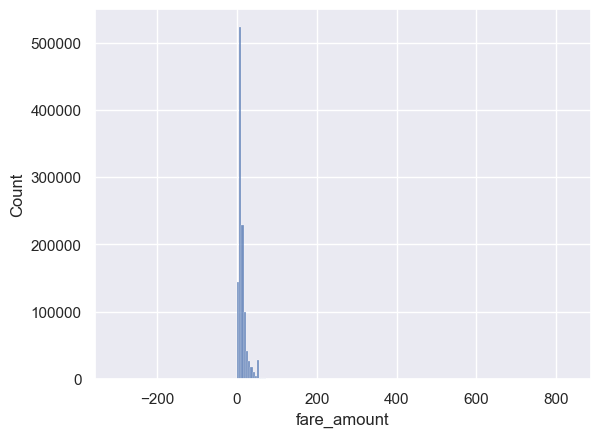

In [32]:
sns.histplot(data['fare_amount'],kde=False,bins=200)

From above we can observe that the distribution is skewed, with cases where the fare amount paid less than 0

<Axes: ylabel='fare_amount'>

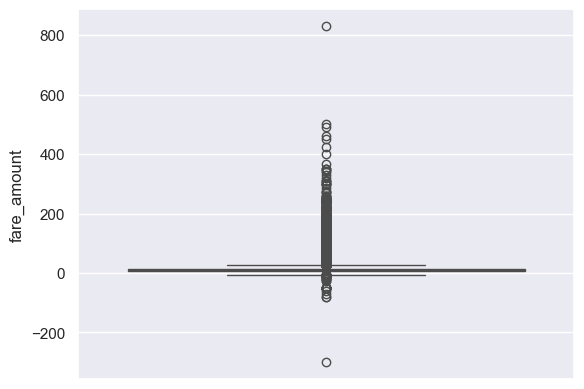

In [33]:
sns.boxplot(data['fare_amount'])

In [35]:
#What is the mean of the trip duration
data['fare_amount'].mean()

12.97618528129825

In [36]:
#What is the medium
data['fare_amount'].median()

9.5

In [37]:
data['fare_amount'].value_counts()

fare_amount
6.00      55567
6.50      55305
7.00      54364
5.50      54116
7.50      51652
          ...  
226.00        1
28.88         1
194.50        1
157.00        1
22.25         1
Name: count, Length: 697, dtype: int64

In [38]:
data['fare_amount'].sort_values(ascending=False)

251877    830.00
586432    500.00
988456    490.00
784361    460.00
425857    450.00
           ...  
610944    -60.00
231867    -70.00
734749    -79.26
743635    -80.00
27127    -300.00
Name: fare_amount, Length: 1134081, dtype: float64

In [40]:
#fare amount <0
sum(data['fare_amount']==0),sum(data['fare_amount']<=0)

(328, 903)

In [42]:
data[data['fare_amount']<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
2283,2,2017-07-28 12:14:50,2017-07-28 12:14:57,2,0.00,1,N,237,163,3,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3,0.116667,Friday,Friday,4,4,12,12,7,7,Afternoon,Afternoon
2768,2,2017-07-28 15:15:10,2017-07-28 15:21:28,1,0.62,1,N,239,238,3,-6.0,0.0,-0.5,0.0,0.0,-0.3,-6.8,6.300000,Friday,Friday,4,4,15,15,7,7,Afternoon,Afternoon
4593,2,2017-07-29 02:45:46,2017-07-29 02:49:29,1,0.73,1,N,226,146,4,-5.0,-0.5,-0.5,0.0,0.0,-0.3,-6.3,3.716667,Saturday,Saturday,5,5,2,2,7,7,Late night,Late night
7269,2,2017-07-30 02:48:55,2017-07-30 02:51:57,1,0.40,1,N,230,230,3,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3,3.033333,Sunday,Sunday,6,6,2,2,7,7,Late night,Late night
7296,2,2017-07-30 02:28:29,2017-07-30 02:31:36,2,0.85,1,N,68,90,3,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8,3.116667,Sunday,Sunday,6,6,2,2,7,7,Late night,Late night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1125892,2,2017-07-24 22:18:20,2017-07-24 22:18:50,1,0.02,1,N,48,48,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,0.500000,Monday,Monday,0,0,22,22,7,7,Late night,Late night
1126091,2,2017-07-24 23:31:58,2017-07-24 23:35:25,3,0.41,1,N,230,230,3,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8,3.450000,Monday,Monday,0,0,23,23,7,7,Late night,Late night
1128761,2,2017-07-25 22:08:57,2017-07-25 22:10:37,1,0.17,1,N,90,90,3,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,1.666667,Tuesday,Tuesday,1,1,22,22,7,7,Late night,Late night
1130124,2,2017-07-26 12:52:57,2017-07-26 12:58:14,1,0.17,1,N,90,186,4,-5.0,0.0,-0.5,0.0,0.0,-0.3,-5.8,5.283333,Wednesday,Wednesday,2,2,12,12,7,7,Afternoon,Afternoon


The highest fare amount charged is $800 while the least is -$300. There are also records with  fare_amount==0. such cases where the fare amount <=0 will need to be dropped,


**Vendor ID**

In [43]:
data['VendorID'].value_counts()

VendorID
2    622773
1    511308
Name: count, dtype: int64

<Axes: xlabel='VendorID', ylabel='count'>

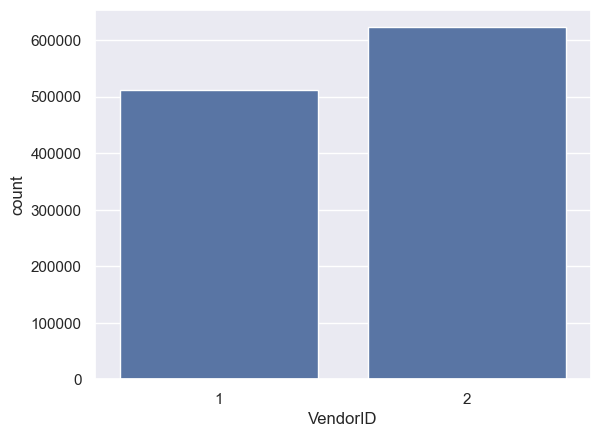

In [44]:
sns.countplot(x='VendorID',data=data)

**Passenger Count**

What is the distribution of passenger counts across the trips?

In [123]:
data['passenger_count'].value_counts()

passenger_count
1    810268
2    164852
5     54099
3     47473
6     33019
4     22691
0      1670
7         4
8         4
9         1
Name: count, dtype: int64

- Seems there are records with 0 passenger counts. This will need to be removed.
- Seems a high percentage of the trips had 1 passenger


**Store and Forward Flag**

In [124]:
data['store_and_fwd_flag'].value_counts(normalize=True)

store_and_fwd_flag
N    0.995765
Y    0.004235
Name: proportion, dtype: float64

Seems there are less than 1% of the trips that were stored before forwarding

**Trip Distance**

Trip distance is measured in miles

In [125]:
#Getting the distribution of trip distance
data['trip_distance'].value_counts()

trip_distance
0.90     26360
0.80     25893
1.00     25659
0.70     24709
1.10     24432
         ...  
31.43        1
27.97        1
28.42        1
33.48        1
29.42        1
Name: count, Length: 3153, dtype: int64

<Axes: xlabel='trip_distance', ylabel='Count'>

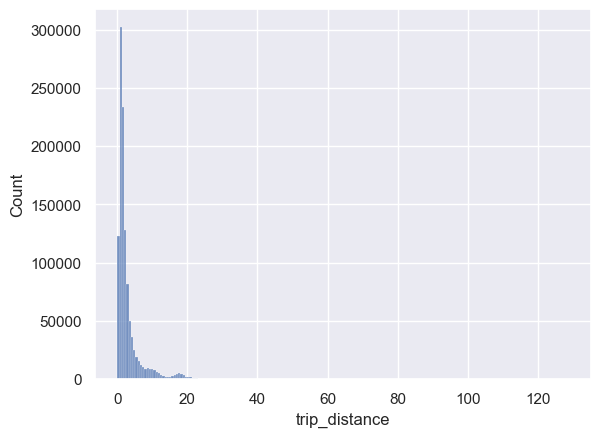

In [126]:
sns.histplot(data['trip_distance'],kde=False,bins=200)

In [127]:
data['trip_distance'].mean(),data['trip_distance'].median()

(2.9279336837492194, 1.62)

<Axes: ylabel='trip_distance'>

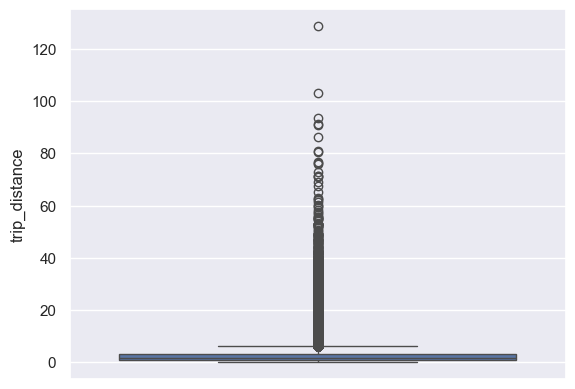

In [128]:
sns.boxplot(data['trip_distance'])

The average trip distance is about 3 miles with a median of about 1.6 miles

**Trip per Day**

Understanding the distribution of the trips per day of the week

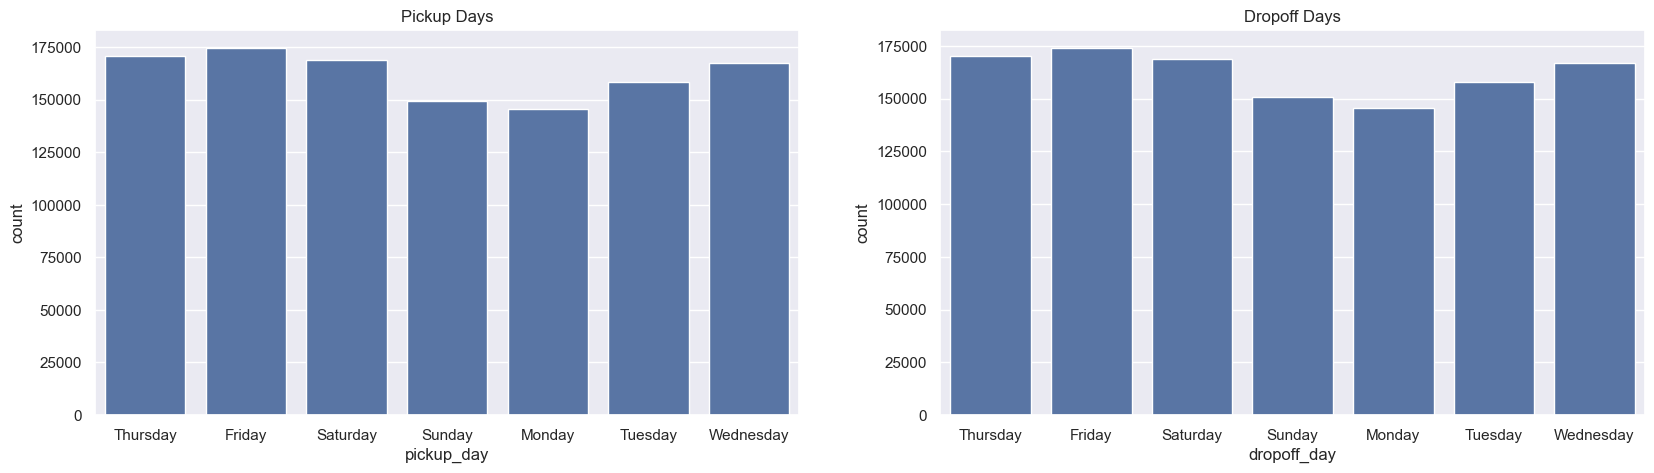

In [129]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=data,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=data,ax=ax2)

We observe that Friday is the busiest followed by Saturday probably because it's a weekend. Mondays have the least number of trips

**Trips per Hour**

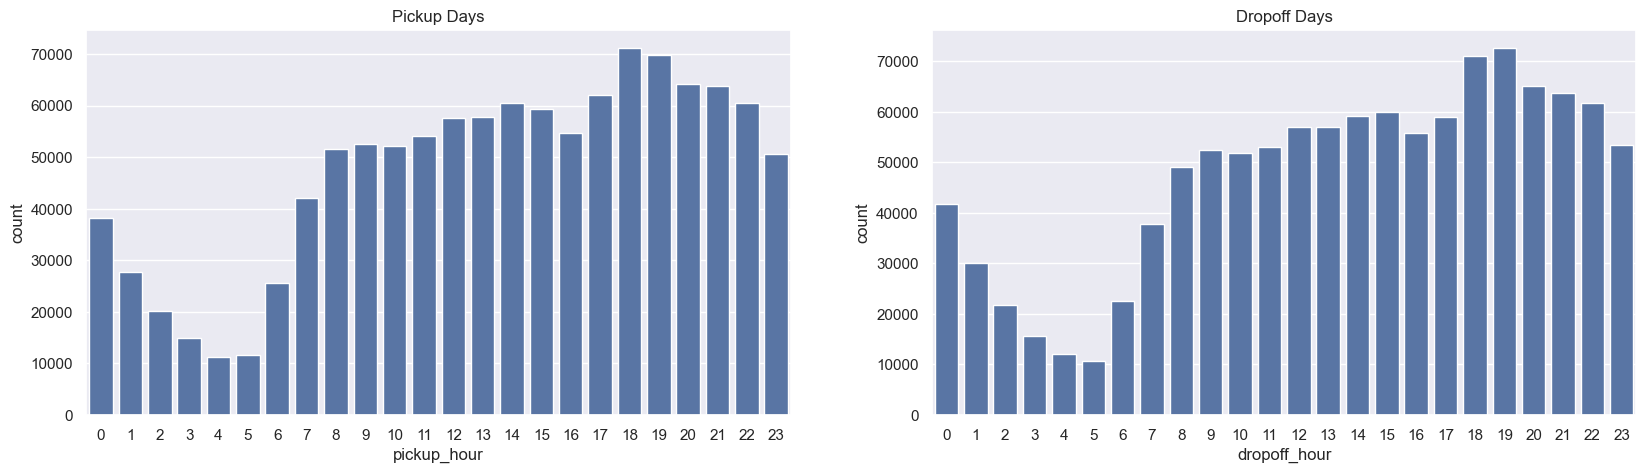

In [130]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Pickup Days')
ax=sns.countplot(x="pickup_hour",data=data,ax=ax9)
ax10.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_hour",data=data,ax=ax10)

**Trips per Time of Day**

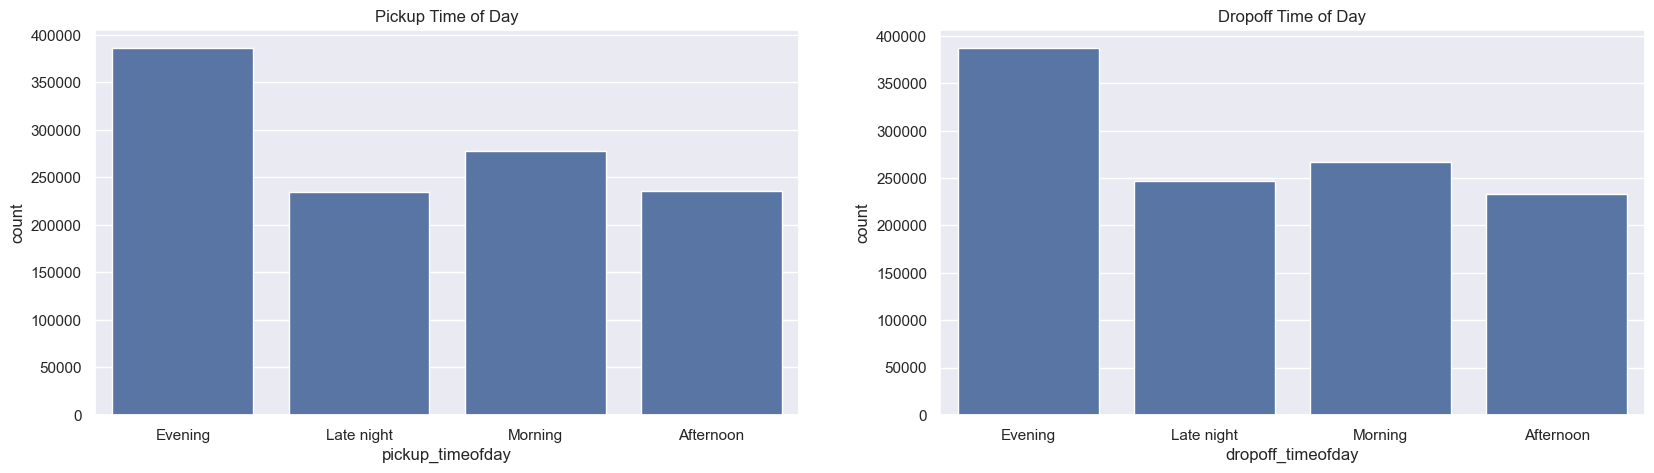

In [131]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=data,ax=ax3)
ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=data,ax=ax4)

We observe that the busiest hours are between 6pm to 8pm. In the evenings

**Trips per Month**

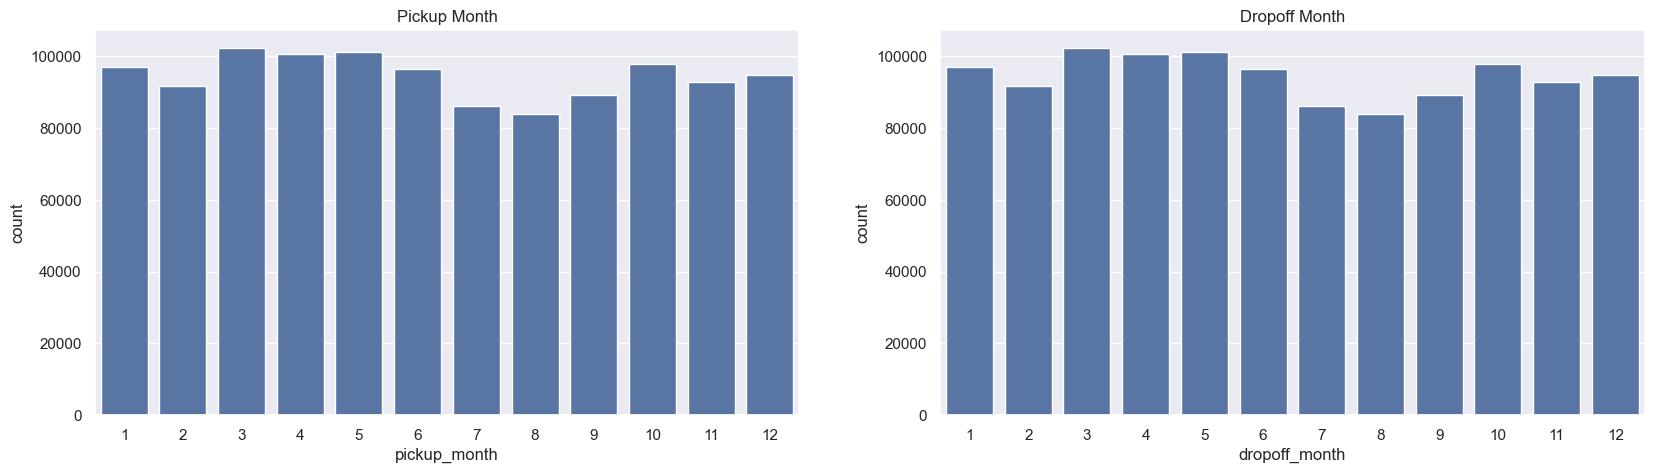

In [132]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))
ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax11)
ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data,ax=ax12)

In [133]:
data['pickup_month'].value_counts()

pickup_month
3     102245
5     101338
4     100542
10     97730
1      97158
6      96397
12     94712
11     92774
2      91731
9      89281
7      86183
8      83990
Name: count, dtype: int64

There's generally not much difference in the number of trips accross the months. 

**Rate Code**

In [134]:
data['RatecodeID'].value_counts()

RatecodeID
1     1101841
2       25315
5        3867
3        2406
4         616
99         29
6           7
Name: count, dtype: int64

We can observe a high number of the trips use Standard Rate

**Payment Type**

In [135]:
data['payment_type'].value_counts(normalize=True)

payment_type
1    0.672237
2    0.321007
3    0.005202
4    0.001555
Name: proportion, dtype: float64

We can observe more than 99% of the trips are credit & cash based. 

**Pickup Location ID**

Understanding the distribution of the trips across the pickup locations

In [136]:
data['PULocationID'].value_counts()

PULocationID
237    44329
161    42584
236    40034
186    39600
230    38638
       ...  
251        1
117        1
5          1
253        1
118        1
Name: count, Length: 246, dtype: int64

In [137]:
data['DOLocationID'].value_counts()

DOLocationID
161    42053
236    41679
237    38533
170    36120
230    34874
       ...  
176        3
187        3
105        2
2          1
99         1
Name: count, Length: 261, dtype: int64

### Bivariate Analysis

We'll try to understand the relationship between the independent variables and the target variable

**Fare Amount per Vendor**

<Axes: xlabel='VendorID', ylabel='fare_amount'>

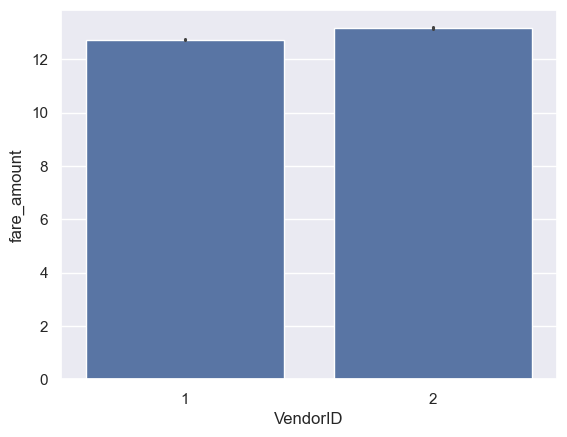

In [45]:
sns.barplot(y='fare_amount',x='VendorID',data=data,estimator=np.mean)

Seems like there isn't much difference in fare amount between the two vendors.

**Fare Amount per Store and Forward Flag**

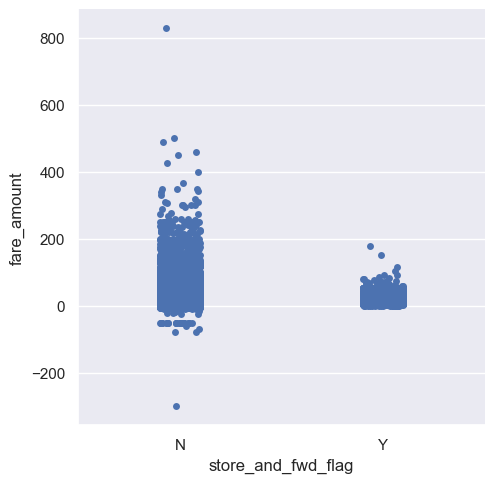

In [46]:
sns.set_theme(palette='deep')
sns.catplot(y='fare_amount',x='store_and_fwd_flag',data=data,kind='strip')

**Fare Amount per passenger count**

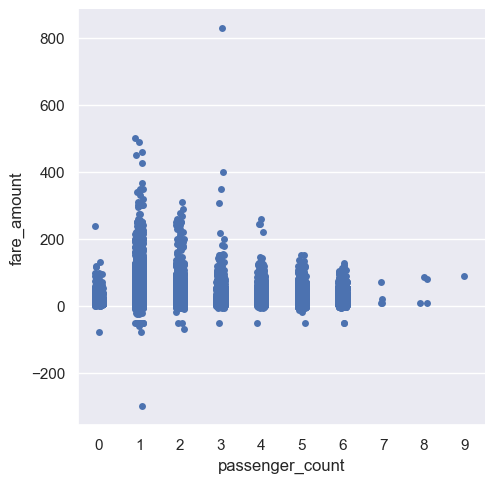

In [48]:
sns.catplot(y='fare_amount',x='passenger_count',data=data,kind='strip')

We can observe that there seems to be no visible relationship between fare amount and passenger count

**Fare Amount per Hour**

<Axes: xlabel='pickup_hour', ylabel='fare_amount'>

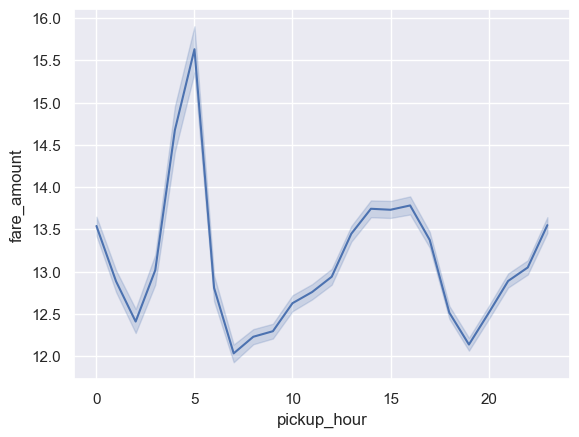

In [49]:
sns.lineplot(x='pickup_hour',y='fare_amount',data=data)

We can observe there is a relationship between fare amount and the pickup time,with early mornings having the highest rates and increases gradually to the afternoon.

**Fare Amount per Day of Week**

In [50]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday
0,2,2017-07-27 18:31:15,2017-07-27 18:48:44,2,2.25,1,N,230,246,2,13.0,1.0,0.5,0.0,0.0,0.3,14.8,17.483333,Thursday,Thursday,3,3,18,18,7,7,Evening,Evening
1,1,2017-07-27 18:53:08,2017-07-27 19:09:18,1,1.80,1,N,246,230,1,11.5,1.0,0.5,2.0,0.0,0.3,15.3,16.166667,Thursday,Thursday,3,3,18,19,7,7,Evening,Evening
2,1,2017-07-27 18:34:32,2017-07-27 18:39:44,1,0.60,1,N,141,262,1,5.0,1.0,0.5,1.0,0.0,0.3,7.8,5.200000,Thursday,Thursday,3,3,18,18,7,7,Evening,Evening
3,2,2017-07-27 18:55:28,2017-07-27 19:06:33,2,1.01,1,N,43,141,2,8.0,1.0,0.5,0.0,0.0,0.3,9.8,11.083333,Thursday,Thursday,3,3,18,19,7,7,Evening,Evening
4,2,2017-07-27 18:20:18,2017-07-27 18:32:35,1,1.18,1,N,48,164,2,9.0,1.0,0.5,0.0,0.0,0.3,10.8,12.283333,Thursday,Thursday,3,3,18,18,7,7,Evening,Evening


<Axes: xlabel='pickup_day', ylabel='fare_amount'>

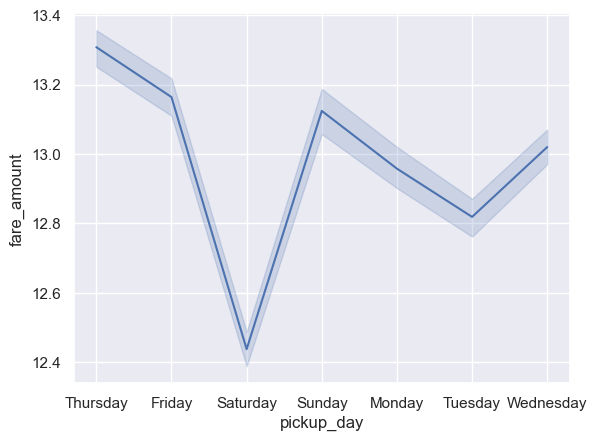

In [51]:
sns.lineplot(x='pickup_day',y='fare_amount',data=data)

We can observe the fare amount is lowest on Saturday's could be because of low demand

**Fare Amount per Month**

<Axes: xlabel='pickup_month', ylabel='fare_amount'>

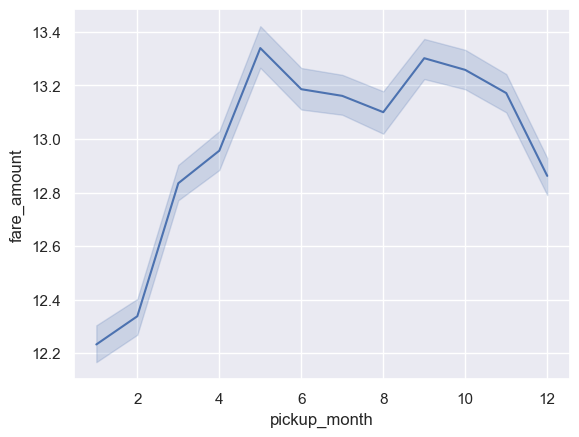

In [52]:
sns.lineplot(x='pickup_month',y='fare_amount',data=data)

We can observe the fare amount is highest between May and October

In [56]:
#eremoving records where trip duration, trip distance and total fare amount are recorded as 0
data = data[(data['trip_duration'] !=0) & (data['trip_distance']!=0) & (data['fare_amount']>0)].reset_index(drop=True)

**Trip Duration & Distance**

<Axes: xlabel='trip_duration', ylabel='trip_distance'>

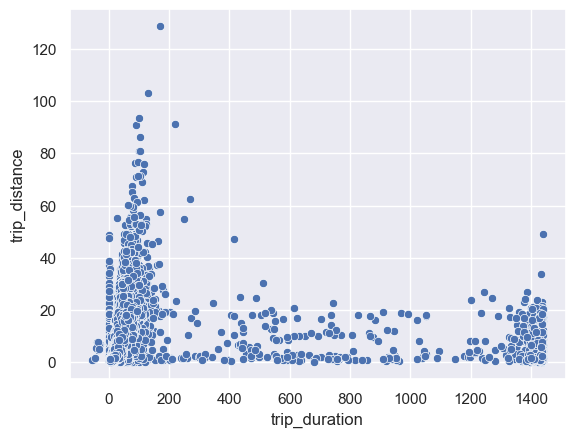

In [57]:
sns.scatterplot(y='trip_distance',x='trip_duration',data=data)

We can observe there are trips which have longer durations yet the distance is less, this could be due to traffic

**Trip Duration & Total Amount**

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

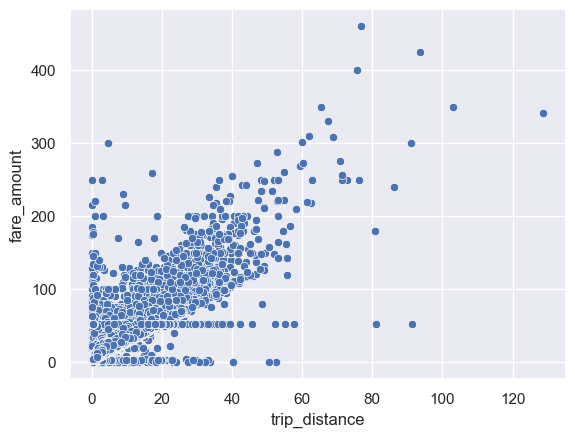

In [58]:
sns.scatterplot(y='fare_amount',x='trip_distance',data=data)

We can observe a linear relationship between the distance and fare amount

**Checking Correlation**

In [147]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'trip_duration', 'pickup_day', 'dropoff_day',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour',
       'pickup_month', 'dropoff_month', 'pickup_timeofday',
       'dropoff_timeofday'],
      dtype='object')

In [62]:
df = data[['VendorID','passenger_count', 'trip_distance', 'trip_duration','RatecodeID', 'store_and_fwd_flag','PULocationID', 'DOLocationID', 'payment_type', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'pickup_day', 'dropoff_day',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour',
       'pickup_month', 'dropoff_month', 'pickup_timeofday',
       'dropoff_timeofday','fare_amount' ]]

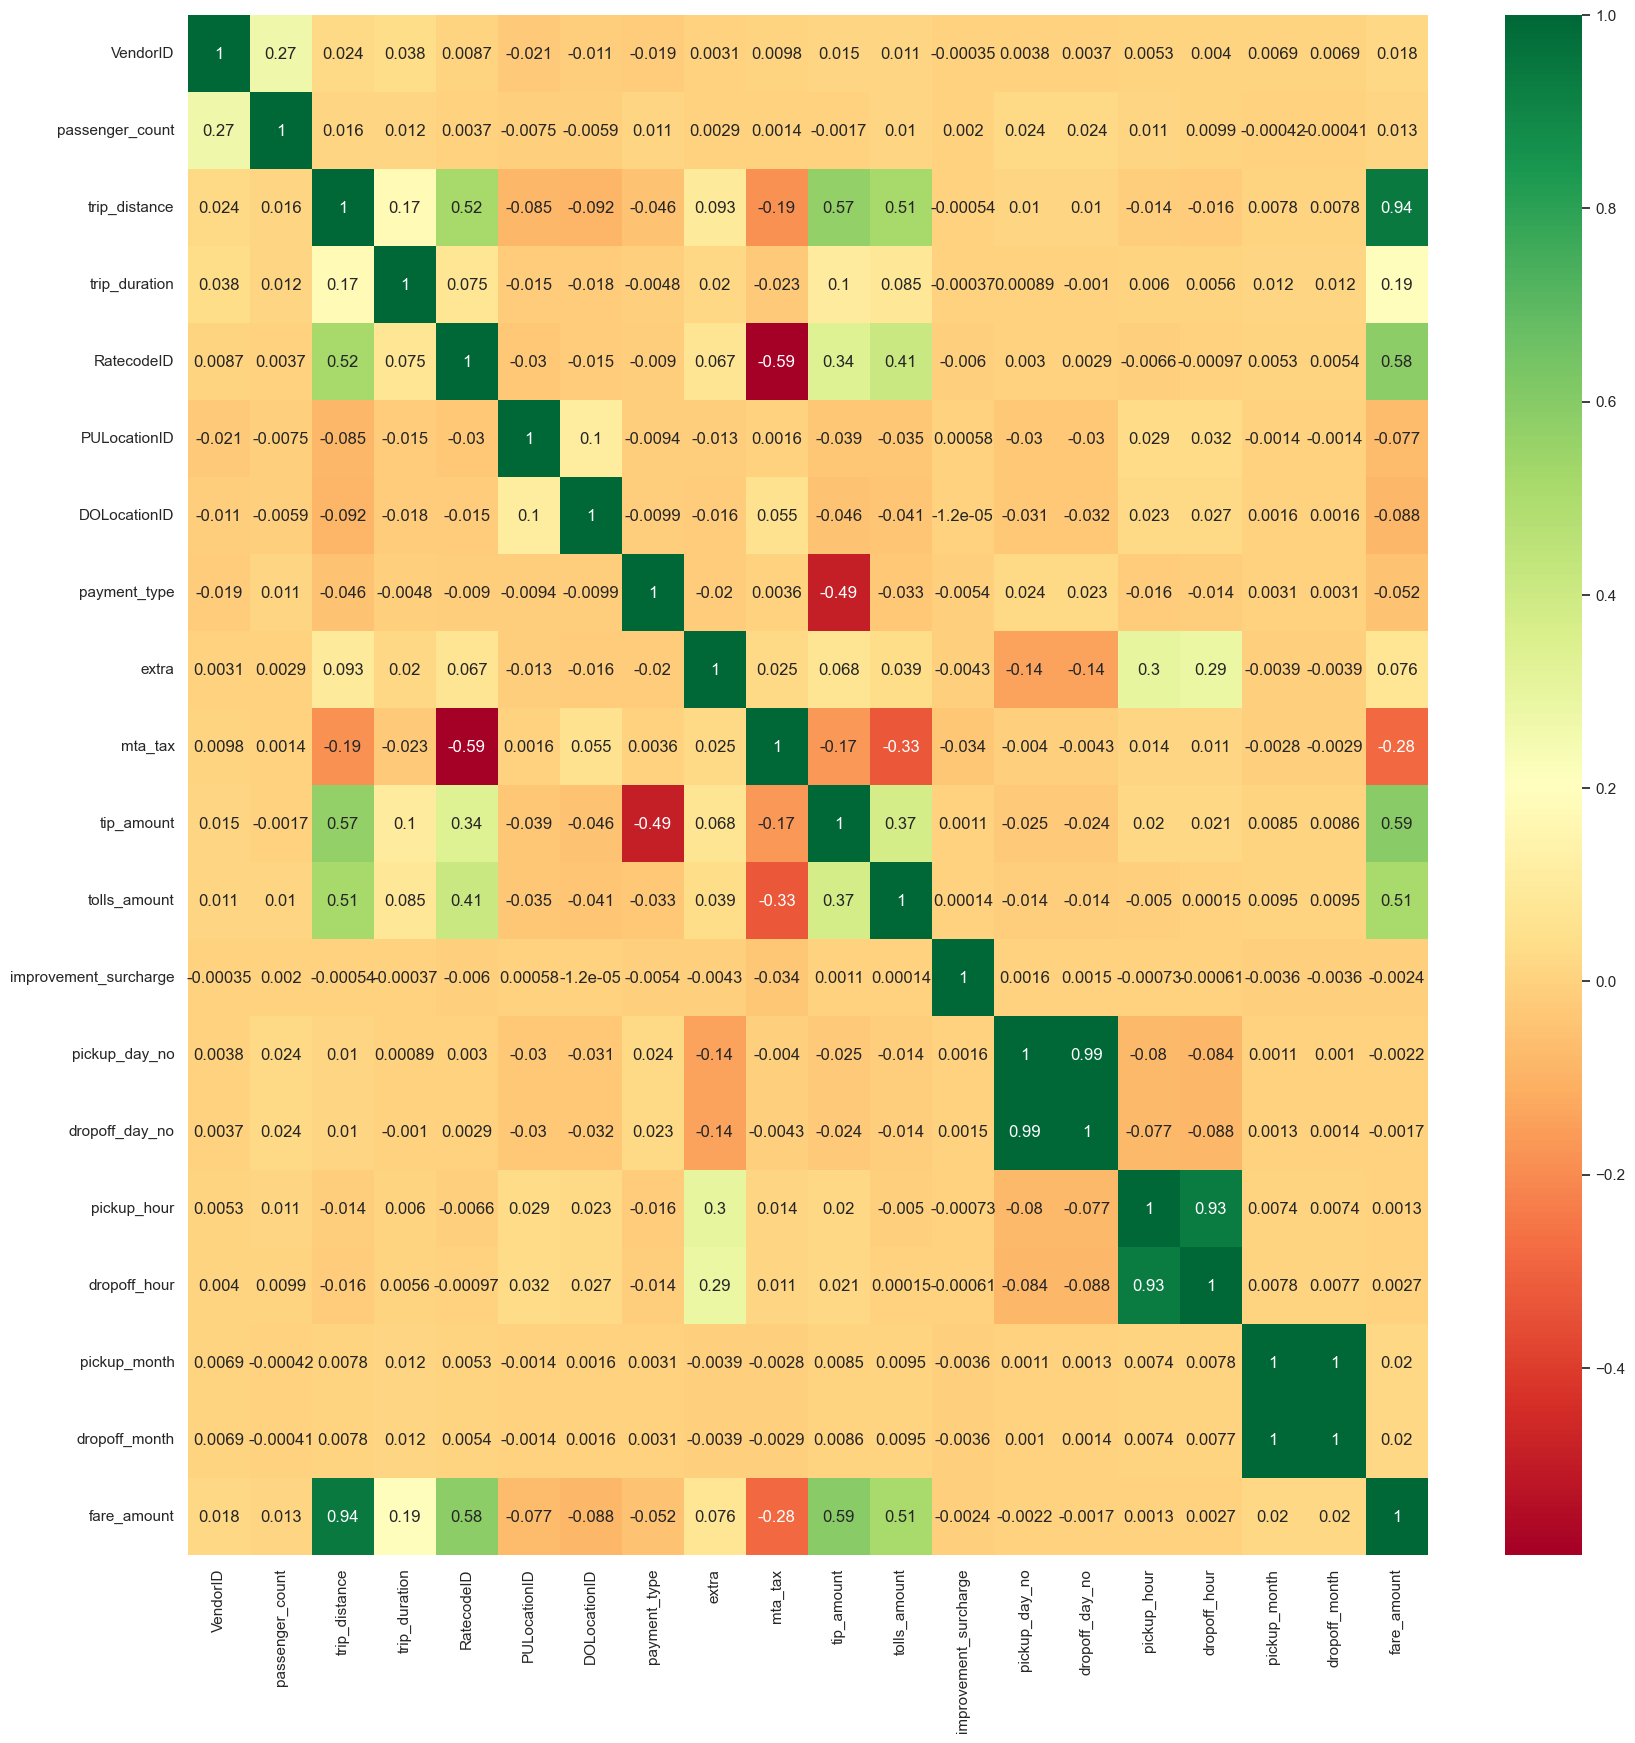

In [63]:
#getting correlation features in the dataset
corrmat = df.corr(numeric_only = True)
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plotting heatmap
g = sns.heatmap(df.corr(numeric_only = True),annot = True,cmap="RdYlGn")

From above, we can observe that trip distance and RateCodeID are the most likely predictors for fare amount

## Feature Engineering

The following process:
- Drop records where the trip duration==0 & trip_distance==0 & total amount ==0 , passenger_count=0
- Split Dependent & Independent variables
- Drop columns that are not needed for the prediction:
- Log transformation of numerical variables;


In [64]:
dataset_ = dataset.copy()

In [65]:
dataset_.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,07/27/2017 06:31:15 PM,07/27/2017 06:48:44 PM,2,2.25,1,N,230,246,2,13.0,1.0,0.5,0.0,0.0,0.3,14.8
1,1,07/27/2017 06:53:08 PM,07/27/2017 07:09:18 PM,1,1.80,1,N,246,230,1,11.5,1.0,0.5,2.0,0.0,0.3,15.3
2,1,07/27/2017 06:34:32 PM,07/27/2017 06:39:44 PM,1,0.60,1,N,141,262,1,5.0,1.0,0.5,1.0,0.0,0.3,7.8
3,2,07/27/2017 06:55:28 PM,07/27/2017 07:06:33 PM,2,1.01,1,N,43,141,2,8.0,1.0,0.5,0.0,0.0,0.3,9.8
4,2,07/27/2017 06:20:18 PM,07/27/2017 06:32:35 PM,1,1.18,1,N,48,164,2,9.0,1.0,0.5,0.0,0.0,0.3,10.8


In [66]:
#Converting to datetime
dataset_["tpep_pickup_datetime"] = pd.to_datetime(dataset_["tpep_pickup_datetime"])
dataset_["tpep_dropoff_datetime"] = pd.to_datetime(dataset_["tpep_dropoff_datetime"])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20964\832130358.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset_["tpep_pickup_datetime"] = pd.to_datetime(dataset_["tpep_pickup_datetime"])


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20964\832130358.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset_["tpep_dropoff_datetime"] = pd.to_datetime(dataset_["tpep_dropoff_datetime"])


In [67]:
#calculating trip duration(in minutes) using pickup & dropoff times
dataset_['trip_duration'] = (dataset_["tpep_dropoff_datetime"] - dataset_["tpep_pickup_datetime"]).dt.total_seconds() / 60

In [68]:
dataset_.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,2,2017-07-27 18:31:15,2017-07-27 18:48:44,2,2.25,1,N,230,246,2,13.0,1.0,0.5,0.0,0.0,0.3,14.8,17.483333
1,1,2017-07-27 18:53:08,2017-07-27 19:09:18,1,1.80,1,N,246,230,1,11.5,1.0,0.5,2.0,0.0,0.3,15.3,16.166667
2,1,2017-07-27 18:34:32,2017-07-27 18:39:44,1,0.60,1,N,141,262,1,5.0,1.0,0.5,1.0,0.0,0.3,7.8,5.200000
3,2,2017-07-27 18:55:28,2017-07-27 19:06:33,2,1.01,1,N,43,141,2,8.0,1.0,0.5,0.0,0.0,0.3,9.8,11.083333
4,2,2017-07-27 18:20:18,2017-07-27 18:32:35,1,1.18,1,N,48,164,2,9.0,1.0,0.5,0.0,0.0,0.3,10.8,12.283333


In [74]:
dataset_.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'trip_duration'],
      dtype='object')

In [70]:
#dropping the cplumns
dataset_.drop(['extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount'],axis=1,inplace=True)

In [71]:
#eremoving records where trip duration, trip distance and total fare amount are recorded as 0
dataset_v2 = dataset_[(dataset_['trip_duration'] !=0) & (dataset_['trip_distance']!=0) & (dataset_['fare_amount']>0)].reset_index(drop=True)

In [72]:
dataset_v2.shape

(1125981, 12)

In [73]:
dataset_v2.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
trip_duration            0
dtype: int64

In [75]:
dataset_v2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,trip_duration
0,2,2017-07-27 18:31:15,2017-07-27 18:48:44,2,2.25,1,N,230,246,2,13.0,17.483333
1,1,2017-07-27 18:53:08,2017-07-27 19:09:18,1,1.80,1,N,246,230,1,11.5,16.166667
2,1,2017-07-27 18:34:32,2017-07-27 18:39:44,1,0.60,1,N,141,262,1,5.0,5.200000
3,2,2017-07-27 18:55:28,2017-07-27 19:06:33,2,1.01,1,N,43,141,2,8.0,11.083333
4,2,2017-07-27 18:20:18,2017-07-27 18:32:35,1,1.18,1,N,48,164,2,9.0,12.283333


In [76]:
dataset_v2.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'trip_duration'],
      dtype='object')

In [77]:
#seapraring the dependent and independent variables
X = dataset_v2[['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type','trip_duration']]

y = dataset_v2[['fare_amount']]

In [78]:
X.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,trip_duration
0,2,2017-07-27 18:31:15,2017-07-27 18:48:44,2,2.25,1,N,230,246,2,17.483333
1,1,2017-07-27 18:53:08,2017-07-27 19:09:18,1,1.80,1,N,246,230,1,16.166667
2,1,2017-07-27 18:34:32,2017-07-27 18:39:44,1,0.60,1,N,141,262,1,5.200000
3,2,2017-07-27 18:55:28,2017-07-27 19:06:33,2,1.01,1,N,43,141,2,11.083333
4,2,2017-07-27 18:20:18,2017-07-27 18:32:35,1,1.18,1,N,48,164,2,12.283333


In [79]:
y.head()

,fare_amount
0,13.0
1,11.5
2,5.0
3,8.0
4,9.0


In [80]:
X.shape,y.shape

((1125981, 11), (1125981, 1))

In [81]:
X.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'trip_duration'],
      dtype='object')

**Feature Creation**

In [85]:
#Creating the time variables
X['pickup_day_no']=X['tpep_pickup_datetime'].dt.weekday
X['dropoff_day_no']=X['tpep_dropoff_datetime'].dt.weekday
X['pickup_hour']=X['tpep_pickup_datetime'].dt.hour
X['dropoff_hour']=X['tpep_dropoff_datetime'].dt.hour
X['pickup_month']=X['tpep_pickup_datetime'].dt.month
X['dropoff_month']=X['tpep_dropoff_datetime'].dt.month
X['pickup_year']=X['tpep_pickup_datetime'].dt.year
X['dropoff_year']=X['tpep_dropoff_datetime'].dt.year

In [86]:
X.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year
0,2,2017-07-27 18:31:15,2017-07-27 18:48:44,2,2.25,1,N,230,246,2,17.483333,3,3,18,18,7,7,2017,2017
1,1,2017-07-27 18:53:08,2017-07-27 19:09:18,1,1.80,1,N,246,230,1,16.166667,3,3,18,19,7,7,2017,2017
2,1,2017-07-27 18:34:32,2017-07-27 18:39:44,1,0.60,1,N,141,262,1,5.200000,3,3,18,18,7,7,2017,2017
3,2,2017-07-27 18:55:28,2017-07-27 19:06:33,2,1.01,1,N,43,141,2,11.083333,3,3,18,19,7,7,2017,2017
4,2,2017-07-27 18:20:18,2017-07-27 18:32:35,1,1.18,1,N,48,164,2,12.283333,3,3,18,18,7,7,2017,2017


In [87]:
#Drop the pickup time stamp
X.drop(['tpep_pickup_datetime','tpep_dropoff_datetime'],axis=1, inplace=True)

In [80]:
X.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_day_no,pickup_hour,pickup_month
0,2,2,2.25,1,N,230,246,2,13.0,1.0,0.5,0.0,0.0,0.3,14.8,3,18,7
1,1,1,1.80,1,N,246,230,1,11.5,1.0,0.5,2.0,0.0,0.3,15.3,3,18,7
2,1,1,0.60,1,N,141,262,1,5.0,1.0,0.5,1.0,0.0,0.3,7.8,3,18,7
3,2,2,1.01,1,N,43,141,2,8.0,1.0,0.5,0.0,0.0,0.3,9.8,3,18,7
4,2,1,1.18,1,N,48,164,2,9.0,1.0,0.5,0.0,0.0,0.3,10.8,3,18,7


In [88]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125981 entries, 0 to 1125980
Data columns (total 17 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   VendorID            1125981 non-null  int64  
 1   passenger_count     1125981 non-null  int64  
 2   trip_distance       1125981 non-null  float64
 3   RatecodeID          1125981 non-null  int64  
 4   store_and_fwd_flag  1125981 non-null  object 
 5   PULocationID        1125981 non-null  int64  
 6   DOLocationID        1125981 non-null  int64  
 7   payment_type        1125981 non-null  int64  
 8   trip_duration       1125981 non-null  float64
 9   pickup_day_no       1125981 non-null  int32  
 10  dropoff_day_no      1125981 non-null  int32  
 11  pickup_hour         1125981 non-null  int32  
 12  dropoff_hour        1125981 non-null  int32  
 13  pickup_month        1125981 non-null  int32  
 14  dropoff_month       1125981 non-null  int32  
 15  pickup_year    

In [89]:
X.isnull().sum()

VendorID              0
passenger_count       0
trip_distance         0
RatecodeID            0
store_and_fwd_flag    0
PULocationID          0
DOLocationID          0
payment_type          0
trip_duration         0
pickup_day_no         0
dropoff_day_no        0
pickup_hour           0
dropoff_hour          0
pickup_month          0
dropoff_month         0
pickup_year           0
dropoff_year          0
dtype: int64

**One hot Encoding the Store_and_flag column**

In [90]:
dummies = pd.get_dummies(X[['store_and_fwd_flag']],drop_first=True)
dummies

,store_and_fwd_flag_Y
0,False
1,False
2,False
3,False
4,False
...,...
1125976,False
1125977,False
1125978,False
1125979,False


In [91]:
#concatenating
X1 = pd.concat([X,dummies],axis=1)

In [92]:
X1.drop(['store_and_fwd_flag'],axis=1,inplace=True)

In [93]:
X1.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year,store_and_fwd_flag_Y
0,2,2,2.25,1,230,246,2,17.483333,3,3,18,18,7,7,2017,2017,False
1,1,1,1.80,1,246,230,1,16.166667,3,3,18,19,7,7,2017,2017,False
2,1,1,0.60,1,141,262,1,5.200000,3,3,18,18,7,7,2017,2017,False
3,2,2,1.01,1,43,141,2,11.083333,3,3,18,19,7,7,2017,2017,False
4,2,1,1.18,1,48,164,2,12.283333,3,3,18,18,7,7,2017,2017,False


## Feature Scaling

In [94]:
#Performing feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X1)

MinMaxScaler()

In [95]:
#transforming
scaler.transform(X1)

array([[1.        , 0.22222222, 0.01740617, ..., 1.        , 0.9       ,
        0.        ],
       [0.        , 0.11111111, 0.01390939, ..., 1.        , 0.9       ,
        0.        ],
       [0.        , 0.11111111, 0.00458466, ..., 1.        , 0.9       ,
        0.        ],
       ...,
       [1.        , 0.22222222, 0.01196674, ..., 1.        , 0.9       ,
        0.        ],
       [0.        , 0.11111111, 0.01002409, ..., 1.        , 0.9       ,
        0.        ],
       [0.        , 0.22222222, 0.06519543, ..., 1.        , 0.9       ,
        0.        ]])

In [96]:
X2 = pd.DataFrame(scaler.transform(X1),columns=X1.columns)

In [97]:
X2.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year,store_and_fwd_flag_Y
0,1.0,0.222222,0.017406,0.0,0.867424,0.928030,0.333333,0.048559,0.5,0.5,0.782609,0.782609,0.545455,0.545455,1.0,0.9,0.0
1,0.0,0.111111,0.013909,0.0,0.928030,0.867424,0.000000,0.047678,0.5,0.5,0.782609,0.826087,0.545455,0.545455,1.0,0.9,0.0
2,0.0,0.111111,0.004585,0.0,0.530303,0.988636,0.000000,0.040341,0.5,0.5,0.782609,0.782609,0.545455,0.545455,1.0,0.9,0.0
3,1.0,0.222222,0.007771,0.0,0.159091,0.530303,0.333333,0.044277,0.5,0.5,0.782609,0.826087,0.545455,0.545455,1.0,0.9,0.0
4,1.0,0.111111,0.009092,0.0,0.178030,0.617424,0.333333,0.045080,0.5,0.5,0.782609,0.782609,0.545455,0.545455,1.0,0.9,0.0


In [100]:
#saving the transformed dataframe to a csv file
X2.to_csv("../Transformed_Data/fare_prediction_transformed.csv",index=False)

## Feature Selection

The goal is to select the best features to use for predicting the trip duration

In [101]:
X2.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_year,dropoff_year,store_and_fwd_flag_Y
0,1.0,0.222222,0.017406,0.0,0.867424,0.928030,0.333333,0.048559,0.5,0.5,0.782609,0.782609,0.545455,0.545455,1.0,0.9,0.0
1,0.0,0.111111,0.013909,0.0,0.928030,0.867424,0.000000,0.047678,0.5,0.5,0.782609,0.826087,0.545455,0.545455,1.0,0.9,0.0
2,0.0,0.111111,0.004585,0.0,0.530303,0.988636,0.000000,0.040341,0.5,0.5,0.782609,0.782609,0.545455,0.545455,1.0,0.9,0.0
3,1.0,0.222222,0.007771,0.0,0.159091,0.530303,0.333333,0.044277,0.5,0.5,0.782609,0.826087,0.545455,0.545455,1.0,0.9,0.0
4,1.0,0.111111,0.009092,0.0,0.178030,0.617424,0.333333,0.045080,0.5,0.5,0.782609,0.782609,0.545455,0.545455,1.0,0.9,0.0


In [102]:
X2.isnull().sum()

VendorID                0
passenger_count         0
trip_distance           0
RatecodeID              0
PULocationID            0
DOLocationID            0
payment_type            0
trip_duration           0
pickup_day_no           0
dropoff_day_no          0
pickup_hour             0
dropoff_hour            0
pickup_month            0
dropoff_month           0
pickup_year             0
dropoff_year            0
store_and_fwd_flag_Y    0
dtype: int64

In [103]:
y.head()

,fare_amount
0,13.0
1,11.5
2,5.0
3,8.0
4,9.0


In [104]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [105]:
#Splitting the dataset into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 13)

In [106]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=13))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=13))

In [107]:
feature_sel_model.get_support()

array([ True, False,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False, False])

In [108]:
# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 17
selected features: 10
features with coefficients shrank to zero: 7


In [109]:
selected_feat

Index(['VendorID', 'trip_distance', 'RatecodeID', 'DOLocationID',
       'payment_type', 'trip_duration', 'pickup_day_no', 'dropoff_hour',
       'pickup_month', 'dropoff_month'],
      dtype='object')

In [110]:
#Updating the data with the selected features
X3 = X2[selected_feat]

## Model Building

**Baseline Models**


In [111]:
#Splitting the dataset into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size = 0.2, random_state = 13)


**Using Linear Regression**

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
#Using linear regression
lr = LinearRegression()


In [113]:
lr.fit(X_train, y_train)

LinearRegression()

In [114]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2_score=r2_score(y_test,y_pred)
print("r2 score is:",r2_score)
print("Mean Squared Error:", mse)

r2 score is: 0.8976321209407925
Mean Squared Error: 12.47886913156659


Seems the linear regression model has an accuracy of about 90%. It's worth experimenting with other mpdels

**Using Random Forest Regressor**

In [115]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model on the training data
rf.fit(X_train, y_train)

c:\Users\ADMIN\Documents\Data Analytics\Interview Prep\NYC Yellow Taxi Trip Prediction\venv\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [116]:
# Make predictions on the test data
y_pred = rf.predict(X_test)

In [119]:
mse = mean_squared_error(y_test, y_pred)
#r2_score=r2_score(y_test,y_pred)
#print("r2 score is:",r2_score)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.369461412541253


**Using XGBoost Regressor**

In [123]:
#Using XGBoost Regressor
from xgboost import XGBRegressor
xg = XGBRegressor()
#Traiing tne model
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [124]:
y_pred = xg.predict(X_test)

In [125]:
mse = mean_squared_error(y_test, y_pred)
#r2_score=r2_score(y_test,y_pred)
#print("r2 score is:",r2_score)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.228697208315752


From the above experiments, seems like the random forest regressor performs better, while the linear regresson model might have a tendency to overfit.

**Using Cross Validation**

In [126]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=13)

cross_val_score(rf,X3,y,cv=cv)

c:\Users\ADMIN\Documents\Data Analytics\Interview Prep\NYC Yellow Taxi Trip Prediction\venv\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ADMIN\Documents\Data Analytics\Interview Prep\NYC Yellow Taxi Trip Prediction\venv\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ADMIN\Documents\Data Analytics\Interview Prep\NYC Yellow Taxi Trip Prediction\venv\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwa

array([0.9805626 , 0.9780578 , 0.9839    , 0.98068052, 0.98225821])

We can observe from the above 5 iterations using random forest regressor, we get an accuracy score above 99%.

**Using Grid Search CV**

In [1]:
from sklearn.model_selection import GridSearchCV

#Finding the best model to use
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': lr,
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'random_forest': {
            'model': rf,
            'params': {
                'n_estimators': [10,25,50,100],
                'max_depth':[10,20,None],
                
            }
        },
        'xgboost': {
            'model': xg,
            'params': {
                'n_estimators': [10,25,50,100],
                'booster':['gbtree','gblinear','dart'],
                'max_depth':[5,10,20],
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X3,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X3,y)

**Exporting the model**

In [120]:
#Exporting the model to a pickle file
import pickle
with open('..\Models\predict_taxi_fare.pickle','wb') as f:
    pickle.dump(rf,f)

Exporting the schema of the X_test data

In [122]:
import json
columns = {
    'data_columns' : [col.lower() for col in X3.columns]
}
with open("taxi_fare_prediction_columns.json","w") as f:
    f.write(json.dumps(columns))